# Netflix Movies and TV Shows EDA
##### Dataset from Shivam Bansal on Kaggle.com

In this Jupyter Notebook, I will be performing exploratory data analysis on a Netflix dataset that contains information on movies and tv shows.

In [199]:
#importing python libraries 
import pandas as pd #
import matplotlib.pyplot as plt
import seaborn as sns

In [200]:
#reading in the dataset from Kaggle.com as a dataframe
df = pd.read_csv('/Users/vivianchung/Desktop/projects/netflix_titles.csv')

In [201]:
#looking at the first 5 rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [202]:
#looking at the columns, missing values, data types, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [203]:
#looking at column names
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [204]:
#looking at columns with null values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [205]:
#calculating the percent missing in the columns
per_missing = df.isnull().sum() * 100 / len(df)
per_missing

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [206]:
#looking for duplicated values
df.duplicated().sum()

0

# Data wrangling
1. remove rows with missing data, this will differ between datasets and depends on the context
2. change the 'date_added' column from an object to date-time
3. add 3 new columns for the year, month, and day

### 1. Dealing with missing data
This depends on the dataset itself but I will drop all the rows with missing data. I could decide to replace the missing data with the most common value but I don't like to this because sometimes it is not true. 

In [207]:
#df['country'] = df['country'].fillna(df['country'].mode()[0])
#this code will fill in the missing country rows with the most common country or the mode

In [208]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5332 entries, 7 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5332 non-null   object
 1   type          5332 non-null   object
 2   title         5332 non-null   object
 3   director      5332 non-null   object
 4   cast          5332 non-null   object
 5   country       5332 non-null   object
 6   date_added    5332 non-null   object
 7   release_year  5332 non-null   int64 
 8   rating        5332 non-null   object
 9   duration      5332 non-null   object
 10  listed_in     5332 non-null   object
 11  description   5332 non-null   object
dtypes: int64(1), object(11)
memory usage: 541.5+ KB


In [210]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


### 2. Changing 'date_added' from object to datetime

In [211]:
df['date_added'] = df['date_added'].str.strip()

In [212]:
df['date_added'] = pd.to_datetime(df['date_added'])

### 3. Adding new columns for 'month_added', 'month_name', and 'year_added'

In [213]:
df['month_added']=df['date_added'].dt.month
df['month_name']=df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

In [214]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5332 entries, 7 to 8806
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       5332 non-null   object        
 1   type          5332 non-null   object        
 2   title         5332 non-null   object        
 3   director      5332 non-null   object        
 4   cast          5332 non-null   object        
 5   country       5332 non-null   object        
 6   date_added    5332 non-null   datetime64[ns]
 7   release_year  5332 non-null   int64         
 8   rating        5332 non-null   object        
 9   duration      5332 non-null   object        
 10  listed_in     5332 non-null   object        
 11  description   5332 non-null   object        
 12  month_added   5332 non-null   int32         
 13  month_name    5332 non-null   object        
 14  year_added    5332 non-null   int32         
dtypes: datetime64[ns](1), int32(2), int64(1), o

In [215]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name,year_added
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",9,September,2021
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,9,September,2021
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,9,September,2021
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,9,September,2021
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,9,September,2021


# Exploratory Data Analysis

In [216]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [217]:
type_counts = df['type'].value_counts()
type_counts

type
Movie      5185
TV Show     147
Name: count, dtype: int64

In [218]:
sum = df['type'].count()
sum

5332

In [219]:
type_percent = round(type_counts / sum * 100, 2)
type_percent

type
Movie      97.24
TV Show     2.76
Name: count, dtype: float64

> 97.24% are Netflix movies and only 2.76% are Netflix TV shows. 

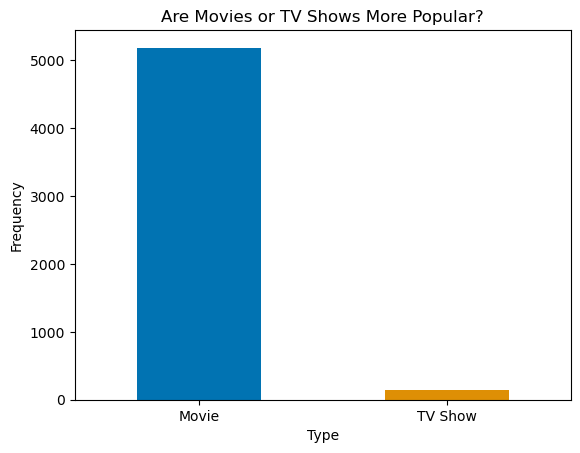

In [220]:
color_palette = sns.color_palette("colorblind")

type_counts.plot(kind='bar', color=color_palette)
plt.title('Are Movies or TV Shows More Popular?')
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

> We can clearly see that there are more Netflix movies than TV shows.

In [221]:
#top 10 most common release years
popular_year = df['release_year'].value_counts().head(10)
#putting the release years in order
popular_year = popular_year.sort_index()
popular_year

release_year
2012    163
2013    197
2014    242
2015    349
2016    577
2017    657
2018    648
2019    519
2020    442
2021    161
Name: count, dtype: int64

In [222]:
popular_year

release_year
2012    163
2013    197
2014    242
2015    349
2016    577
2017    657
2018    648
2019    519
2020    442
2021    161
Name: count, dtype: int64

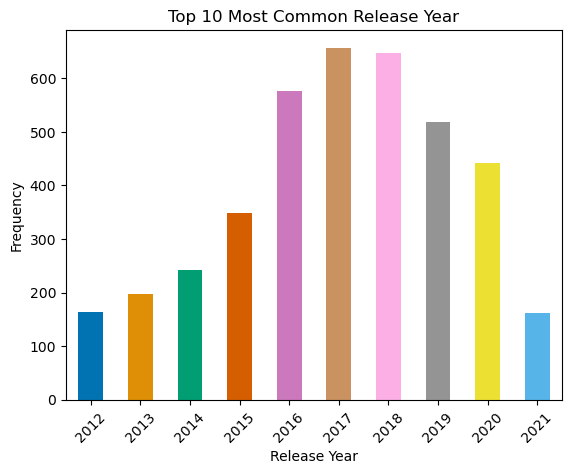

In [223]:
color_palette = sns.color_palette('colorblind')

popular_year.plot(kind='bar',color=color_palette)
plt.title('Top 10 Most Common Release Year')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

> More movies and TV shows were released in 2016, 2017, and 2018 with 2017 have the most releases.

In [224]:
rating_count = df['rating'].value_counts()
rating_count

rating
TV-MA       1822
TV-14       1214
R            778
PG-13        470
TV-PG        431
PG           275
TV-G          84
TV-Y7         76
TV-Y          76
NR            58
G             40
TV-Y7-FV       3
UR             3
NC-17          2
Name: count, dtype: int64

In [225]:
movie_df = df[df['type'] == 'Movie']
tv_df = df[df['type'] == 'TV Show']

In [226]:
movie_rating_count = movie_df['rating'].value_counts()
movie_rating_count

rating
TV-MA       1741
TV-14       1177
R            778
PG-13        470
TV-PG        416
PG           275
TV-G          81
TV-Y          71
TV-Y7         70
NR            58
G             40
TV-Y7-FV       3
UR             3
NC-17          2
Name: count, dtype: int64

In [227]:
tv_rating_count = tv_df['rating'].value_counts()
tv_rating_count

rating
TV-MA    81
TV-14    37
TV-PG    15
TV-Y7     6
TV-Y      5
TV-G      3
Name: count, dtype: int64

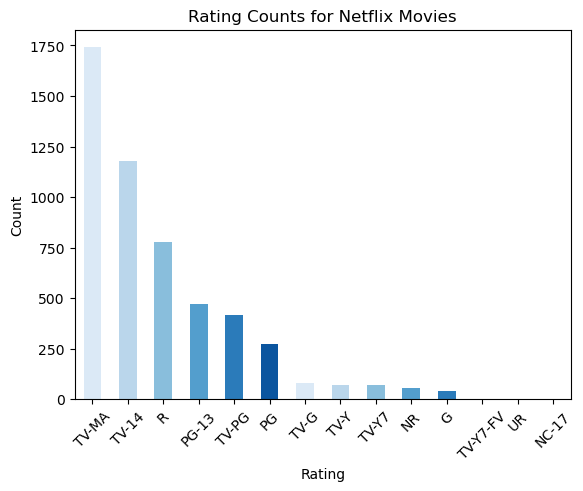

In [228]:
color_palette = sns.color_palette('Blues')

movie_rating_count.plot(kind='bar', color=color_palette)
plt.title('Rating Counts for Netflix Movies')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show();

> The most popular rating for Netflix Movies is TV-MA.

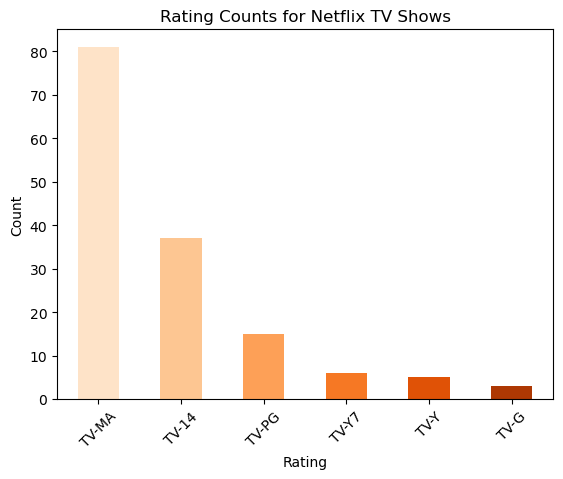

In [229]:
color_palette = sns.color_palette('Oranges')


tv_rating_count.plot(kind='bar', color=color_palette)
plt.title('Rating Counts for Netflix TV Shows')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show();

> The most popular rating to Neflix TV shows is also TV-MA.

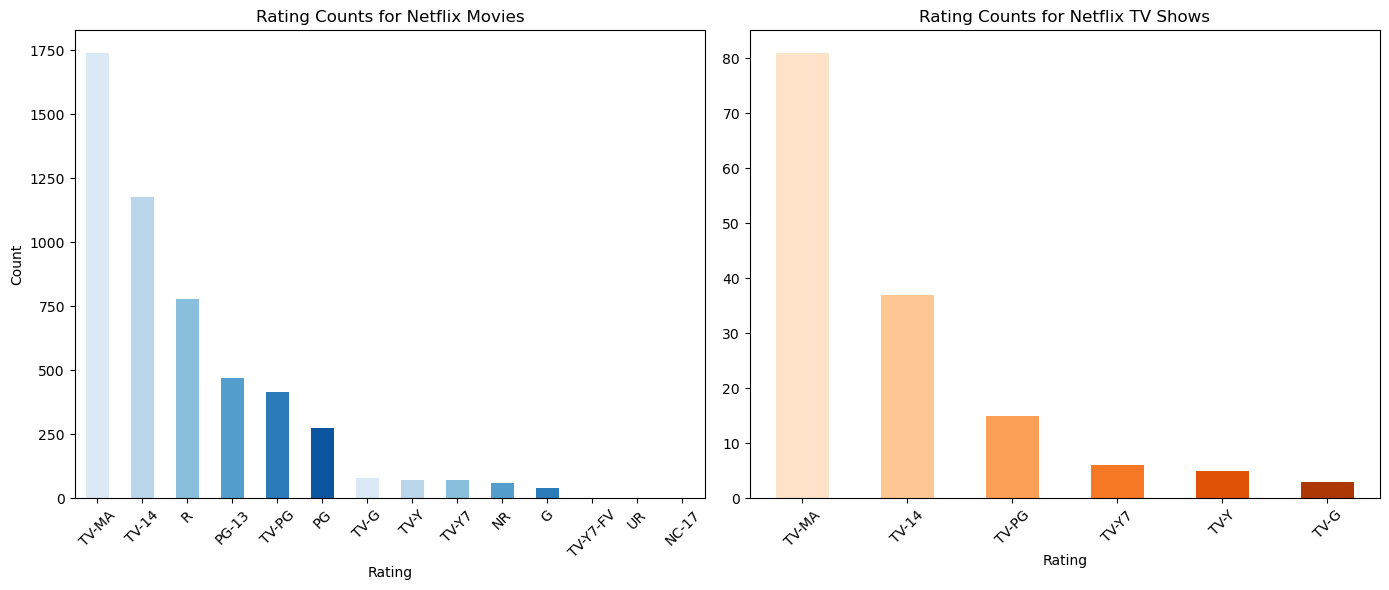

In [230]:
# Plot the data using subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

blue_palette = sns.color_palette('Blues')
orange_palette = sns.color_palette('Oranges')


# Plot for Movies
movie_rating_count.plot(kind='bar', ax=axes[0], color=blue_palette)
axes[0].set_title('Rating Counts for Netflix Movies')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(movie_rating_count.index, rotation=45)

# Plot for TV Shows
tv_rating_count.plot(kind='bar', ax=axes[1], color=orange_palette)
axes[1].set_title('Rating Counts for Netflix TV Shows')
axes[1].set_xlabel('Rating')
axes[1].set_xticklabels(tv_rating_count.index, rotation=45)

plt.tight_layout()
plt.show()

> Here are the plots side by side. We see that TV-MA and TV-14 ratings are the most popular ratings for movies and TV shows.

# Conclusions and Findings
1. Neflix produced more movies than TV shows with 97.24% being movies and only 2.76% being TV shows. 
2. The majority of movies and TV shows were released in 2016, 2017, and 2018. 2017 had the most releases.
3. TV-MA and TV-14 ratings were the most popular ratings for both movies and TV shows.